<a href="https://colab.research.google.com/github/den2morrow/colab_research/blob/main/data_secret_first_cup_2024_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [215]:
train_df = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/train_target.csv')
test_df = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/test.csv')
example_submit = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/submit.csv')
orders = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/orders.csv')
mobile_events = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/mobile_events.csv')
clients_promo_october = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/clients_promo_october.csv')

# Train and Test EDA

## Train EDA
Думаю стоит дополнить датасет информацией из других таблиц, чтобы было больше фич, для рекомендаций

In [216]:
train_df.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo
0,000D3A20F23EA95811E7B99F3ED09FC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0
1,000D3A20F23EA95811E7B99F3ED09FC8,6,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,25,0
2,000D3A20F23EA95811E7BD373E79565E,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0
3,000D3A20F23EA95811E7BD373E79565E,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0
4,000D3A20F23EA95811E7BDAE71CD3F33,6,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,30,0


In [217]:
train_df.shape, train_df[train_df['apply_promo'] == 1].shape

((27741, 8), (827, 8))

Text(0.5, 1.0, 'Correlation matrix')

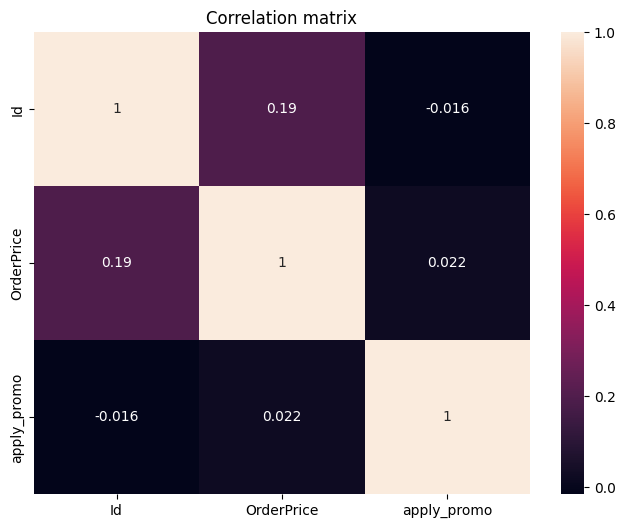

In [218]:
# Есть ли линейная корреляция с ценой заказа и промо / типом скидки и промо?
corr_matrix = train_df[['Id', 'OrderPrice', 'apply_promo']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix') # Вроде нет линейной корреляции

In [219]:
# А какое кол-во применных промокодов в зависимости от типа скидки (рубли, проценты, коины)?
[train_df[(train_df['Id'] == i) & (train_df['apply_promo'] == 1)].shape[0] for i in range(5, 8)]

[289, 239, 299]

## Test EDA
Буду проверять на данном датасете

In [220]:
test_df.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount
0,000D3A20F23EA95811E7C0A95563344E,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200
1,000D3A20F23EA95811E7C7892A0CE261,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,699,200
2,000D3A20F23EA95811E7CD686C396528,6,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,20
3,000D3A20F23EA95911E7CEA8C574EDAE,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200
4,000D3A20F23EA95911E7D4F05C59C978,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200


In [221]:
test_df.shape

(6806, 7)

# Example submit check
Просто как оформить сабмит

In [222]:
example_submit.head()

,apply_promo
0,0.307216
1,0.917305
2,0.386569
3,0.542179
4,0.536205


# Orders EDA
Таблица заказов позволяет понять, какие пользователи были, какие нет, и какие у них прошлые привычки при заказах

In [223]:
orders.head()

,OrderUUId,addressId,deliverySectorId,ClientUUId,Date,SaleDate,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,MenuPrice,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,apply_promo
0,020DD76CCD949AE011EDE031ED5D76FD,NaN,NaN,000D3AAC9DCABB2E11EBE0614C89D044,2023-04-21,2023-04-21T20:51:26.000Z,000D3A2480C380DA11E692CFB9F92484,0,18,000D3A240C71BE9A11E719BE2AB264A6,4,1.0,45.0,4,2,1.0,3,0
1,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,11EC9AABAD354BE051CCF1EE1F83A8D0,1,485.0,485.0,4,2,1164.0,1,0
2,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,11EB846583CB3BDEA80D1A7F2E184D40,1,589.0,589.0,4,2,1164.0,1,0
3,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,000D3A240C71BE9A11E719BE2AB267FD,4,45.0,45.0,4,2,1164.0,1,0
4,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,000D3A240C71BE9A11E719BE2AB264A6,4,45.0,45.0,4,2,1164.0,1,0


In [224]:
orders.shape

(611739, 18)

In [225]:
len(orders['ClientUUId'].unique())

16337

In [226]:
# NewClient, ClientOrderNumber, Сколько раз использовал промокоды(ClientCountPromo), процент покупок с промокодами (PercentWithPromo)
# Процент промокодов на каждый тип OrderType
# ProductTotalPrice(цена со скидкой) и MenuPrice(обычная цена), т.е. Discount=MenuPrice-ProductTotalPrice в train_df есть схожее Discount
# Нужно будет еще глянуть на OrderPrice (порог срабатывания, так как думаю это будет влиять на использование промокодов)

In [227]:
orders[(orders['NewClient']  == 1) & (orders['ClientOrderNumber'] > 1)].head()

,OrderUUId,addressId,deliverySectorId,ClientUUId,Date,SaleDate,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,MenuPrice,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,apply_promo


In [228]:
orders[(orders['ClientUUId'].isin(orders[orders['NewClient'] == 0])) & (orders['NewClient'] == 1)]

,OrderUUId,addressId,deliverySectorId,ClientUUId,Date,SaleDate,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,MenuPrice,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,apply_promo


In [229]:
orders['Discount'] = orders['MenuPrice'] - orders['ProductTotalPrice']

In [230]:
# is_new_client = orders.groupby('ClientUUId')['NewClient'].min().reset_index(name='NewClient')
# client_order_features = client_order_features.merge(is_new_client, on='ClientUUId', how='left')
# client_order_features['Discount'] = Пока оставим так, скидка точно влияет, но пока я не могу придумать, какая именно должна быть фича, для работы со скидками

In [231]:
# Создание новых признаков


# Количество использованных промо
client_count_promo = orders.groupby('ClientUUId')['apply_promo'].sum().reset_index(name='client_count_promo')

# Количество заказов клиента из таблицы ClientOrderNumber
# client_order_number = orders.groupby('ClientUUId')['ClientOrderNumber'].max().reset_index(name='ClientOrderNumber')

# Количество заказов клиента
client_order_counts = orders.groupby('ClientUUId')['OrderUUId'].count().reset_index(name='client_order_count')

# Средняя сумма заказа клиента
client_avg_order_price = orders.groupby('ClientUUId')['OrderTotalPrice'].mean().reset_index(name='client_avg_order_price')

# События клиента
client_event_counts = mobile_events.groupby('ClientUUId')['EventName'].count().reset_index(name='client_event_count')

In [232]:
client_order_features = client_count_promo.merge(client_order_counts, on='ClientUUId', how='left')
# client_order_features = client_order_features.merge(client_order_number, on='ClientUUId', how='left')
client_order_features = client_order_features.merge(client_avg_order_price, on='ClientUUId', how='left')
client_order_features = client_order_features.merge(client_event_counts, on='ClientUUId', how='left')

client_order_features['percent_with_promo'] = client_order_features['client_count_promo'] / client_order_features['client_order_count']


In [233]:
client_order_features.head()

,ClientUUId,client_count_promo,client_order_count,client_avg_order_price,client_event_count,percent_with_promo
0,000D3A20F23EA95811E7B7104AC23CD3,62,74,1139.810811,127.0,0.837838
1,000D3A20F23EA95811E7B88F5E50100B,6,52,1150.288462,210.0,0.115385
2,000D3A20F23EA95811E7B8BD71C73877,5,35,945.600000,124.0,0.142857
3,000D3A20F23EA95811E7B95FE7E6321C,5,48,904.229167,52.0,0.104167
4,000D3A20F23EA95811E7B969B5BD2C3F,0,34,1170.529412,120.0,0.000000


In [234]:
client_order_features.isnull().sum()

ClientUUId                 0
client_count_promo         0
client_order_count         0
client_avg_order_price     0
client_event_count        86
percent_with_promo         0
dtype: int64

In [268]:
client_order_features['client_event_count'] = client_order_features['client_event_count'].fillna(0)

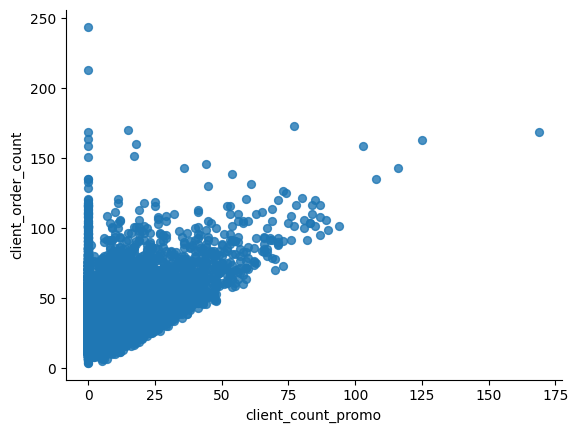

In [235]:
# @title client_count_promo vs client_order_count

from matplotlib import pyplot as plt
client_order_features.plot(kind='scatter', x='client_count_promo', y='client_order_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Mobile Events EDA
На данный момент не могу придумать, как можно было бы использовать эту таблицу

In [236]:
mobile_events.head()

,ClientUUId,VisitToken,EventName,Platform,Timestamp
0,000D3A22FA54A81611EB315CF5443815,976627AD-76DC-41D9-981E-F2A6CA14B3A9,screen_menu,ios,2023-10-29T16:14:21.343Z
1,2A4A64AF719E994511EE3F2D8B31E188,5b22e610-c71e-4b6a-a842-71e8575ece87,screen_menu,android,2023-10-29T11:04:36.4840000Z
2,000D3AAC977BBB2F11ECDD081F5481AE,BDCEB72F-2B6A-4565-801A-6CB729279C6F,open_app,ios,2023-10-29T11:14:34.723Z
3,000D3A21DA51A81411EAE468856F96F1,A66E2DA6-4E2E-4C37-9FBF-627732623212,add_to_cart,ios,2023-10-29T14:03:08.363Z
4,000D3A23B0DC80D811E67F4D0A9CA345,1BE8139F-A3D3-439F-A51B-5CBD4D3FFF1B,screen_menu,ios,2023-10-29T08:35:40.127Z


In [237]:
mobile_events.shape

(3916654, 5)

In [238]:
len(mobile_events['VisitToken'].unique())  # То есть есть одинаковые токены посещения?

223964

# Clients promo october EDA
Таблица позволит понять, какие промокоды интересны пользователям (так как здесь уже выданные и использованные промокоды)

Возможно, LocalBeginDate ~ orders['SaleDate'] или LocalEndDate ~ orders['SaleDate']

Если это так, то можно будет собрать более интересные фичи, объединив две таблицы

In [239]:
clients_promo_october.head()  # Id - 5=рубли, 6=проценты, 7=додокоины

,ClientUUId,Id,LocalBeginDate,LocalEndDate,OrderType,OrderPrice,Discount
0,000D3A20F23EA95811E7B7104AC23CD3,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,25
1,000D3A20F23EA95811E7B7D79FAABAA1,5,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,300
2,000D3A20F23EA95811E7B8BD71C73877,7,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,200
3,000D3A20F23EA95811E7B99F3ED09FC8,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,30
4,000D3A20F23EA95811E7BD373E79565E,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,20


In [240]:
clients_promo_october.shape

(477275, 7)

# Merge data

In [241]:
# Присоединение новых признаков к основному DataFrame
new_train_df = train_df.merge(client_order_features, on='ClientUUId', how='left')

In [242]:
new_train_df.isnull().sum(), new_train_df.shape[0]

(ClientUUId                    0
 Id                            0
 OrderType                     0
 LocalBeginDate                0
 LocalEndDate                  0
 OrderPrice                    0
 Discount                      0
 apply_promo                   0
 client_count_promo        12721
 client_order_count        12721
 client_avg_order_price    12721
 client_event_count        12807
 percent_with_promo        12721
 dtype: int64,
 27741)

In [243]:
new_train_df['client_count_promo'] = new_train_df['client_count_promo'].fillna(0)
new_train_df['client_order_count'] = new_train_df['client_order_count'].fillna(0)
new_train_df['client_avg_order_price'] = new_train_df['client_avg_order_price'].fillna(0)
new_train_df['client_event_count'] = new_train_df['client_event_count'].fillna(0)
new_train_df['percent_with_promo'] = new_train_df['percent_with_promo'].fillna(0)

In [244]:
new_train_df.isnull().sum(), new_train_df.shape[0]

(ClientUUId                0
 Id                        0
 OrderType                 0
 LocalBeginDate            0
 LocalEndDate              0
 OrderPrice                0
 Discount                  0
 apply_promo               0
 client_count_promo        0
 client_order_count        0
 client_avg_order_price    0
 client_event_count        0
 percent_with_promo        0
 dtype: int64,
 27741)

In [245]:
new_train_df['OrderType'].unique(), new_train_df['Id'].unique()

(array(['2,3', '1,2,3'], dtype=object), array([7, 6, 5]))

In [246]:
new_train_df[new_train_df['Id'] == 5]

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo,client_count_promo,client_order_count,client_avg_order_price,client_event_count,percent_with_promo
2,000D3A20F23EA95811E7BD373E79565E,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,0.0,0.0,0.000000,0.0,0.000000
3,000D3A20F23EA95811E7BD373E79565E,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,0.0,0.0,0.000000,0.0,0.000000
5,000D3A20F23EA95811E7BDAE71CD3F33,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,0.0,0.0,0.000000,0.0,0.000000
11,000D3A20F23EA95811E7C4352EC19E2B,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,0.0,0.0,0.000000,0.0,0.000000
18,000D3A20F23EA95911E7D1D7133A0F5A,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27731,7E595BF1EB05B56E11EDB9C6FE6B0F7B,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,749,200,0,0.0,0.0,0.000000,0.0,0.000000
27736,82EDBCD6CE60978F11EDC591DCA75401,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,10.0,42.0,1443.595238,159.0,0.238095
27737,82EDBCD6CE60978F11EDC591DCA75401,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,10.0,42.0,1443.595238,159.0,0.238095
27739,8606F5E4CA39BF7211EE517E6E1D90B7,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,749,200,0,0.0,0.0,0.000000,0.0,0.000000


In [247]:
# Обработка категориальных признаков
new_train_df = pd.get_dummies(new_train_df, columns=['Id'], prefix='Id')

In [248]:
new_train_df.head()

,ClientUUId,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo,client_count_promo,client_order_count,client_avg_order_price,client_event_count,percent_with_promo,Id_5,Id_6,Id_7
0,000D3A20F23EA95811E7B99F3ED09FC8,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,1853.727273,187.0,0.0,False,False,True
1,000D3A20F23EA95811E7B99F3ED09FC8,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,25,0,0.0,33.0,1853.727273,187.0,0.0,False,True,False
2,000D3A20F23EA95811E7BD373E79565E,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,0.0,0.0,0.000000,0.0,0.0,True,False,False
3,000D3A20F23EA95811E7BD373E79565E,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,0.0,0.0,0.000000,0.0,0.0,True,False,False
4,000D3A20F23EA95811E7BDAE71CD3F33,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,30,0,0.0,0.0,0.000000,0.0,0.0,False,True,False


In [260]:
# Подготовка данных для модели
X_train = new_train_df.drop(columns=['apply_promo', 'OrderType', 'ClientUUId', 'LocalBeginDate', 'LocalEndDate'])  # OrderType пока убираю, так как не знаю, как кодировать его пока, а ClientUUId потому что это id, который и так есть в таблице
y_train = new_train_df['apply_promo']

In [265]:
X_train.columns

Index(['OrderPrice', 'Discount', 'client_count_promo', 'client_order_count',
       'client_avg_order_price', 'client_event_count', 'percent_with_promo',
       'Id_5', 'Id_6', 'Id_7'],
      dtype='object')

In [285]:
# Разделение данных на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [263]:
# Обучение модели (например, логистическая регрессия)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# ROC AUC CURVE

ROC AUC: 0.6964647221907486


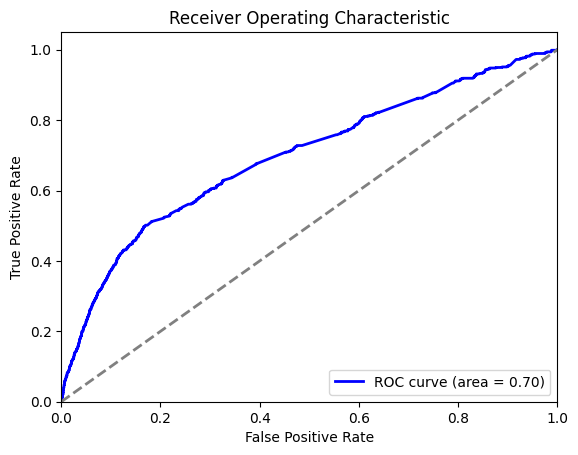

In [266]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Предсказание вероятностей для положительного класса
y_prob = model.predict_proba(X_train)[:, 1]

# Расчет ROC AUC
roc_auc = roc_auc_score(y_train, y_prob)
print('ROC AUC:', roc_auc)

# Построение ROC кривой
fpr, tpr, thresholds = roc_curve(y_train, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

ROC AUC: 0.681311072116708


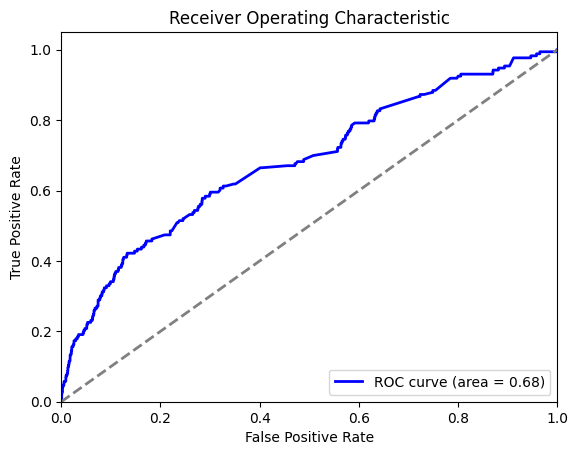

In [267]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Предсказание вероятностей для положительного класса
y_prob_val = model.predict_proba(X_val)[:, 1]

# Расчет ROC AUC
roc_auc = roc_auc_score(y_val, y_prob_val)
print('ROC AUC:', roc_auc)

# Построение ROC кривой
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Preprocess pipeline

In [270]:
# Присоединение новых признаков к основному test DataFrame
new_test_df = test_df.merge(client_order_features, on='ClientUUId', how='left')

# Заполнение пустых значений
new_test_df['client_count_promo'] = new_test_df['client_count_promo'].fillna(0)
new_test_df['client_order_count'] = new_test_df['client_order_count'].fillna(0)
new_test_df['client_avg_order_price'] = new_test_df['client_avg_order_price'].fillna(0)
new_test_df['client_event_count'] = new_test_df['client_event_count'].fillna(0)
new_test_df['percent_with_promo'] = new_test_df['percent_with_promo'].fillna(0)

# Обработка категориальных признаков
new_test_df = pd.get_dummies(new_test_df, columns=['Id'], prefix='Id')

# Удаление столбцов
X_test = new_test_df.drop(columns=['OrderType', 'ClientUUId', 'LocalBeginDate', 'LocalEndDate'])  # OrderType пока убираю, так как не знаю, как кодировать его пока, а ClientUUId потому что это id, который и так есть в таблице


# Create csv file

In [272]:
def get_predictions(model, X_test, save_name: str = 'predictions'):
  # Предсказание вероятностей для положительного класса
  y_prob = model.predict_proba(X_test)[:, 1]

  # Создание DataFrame с предсказаниями
  predictions = pd.DataFrame({'apply_promo': y_prob})

  # Сохранение предсказаний в CSV файл
  predictions.to_csv(f'{save_name}.csv', index_label='index')

  # Вывод первых строк результата для проверки
  print(predictions.head())

# Random Forest Classificator

In [274]:
from sklearn.ensemble import RandomForestClassifier

# Создание и обучение модели RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [275]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def create_roc_auc_curve(model, X, y):
  # Предсказание вероятностей для положительного класса
  y_prob = model.predict_proba(X_train)[:, 1]

  # Расчет ROC AUC
  roc_auc = roc_auc_score(y_train, y_prob)
  print('ROC AUC:', roc_auc)

  # Построение ROC кривой
  fpr, tpr, thresholds = roc_curve(y_train, y_prob)

  plt.figure()
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()

ROC AUC: 0.92031309146227


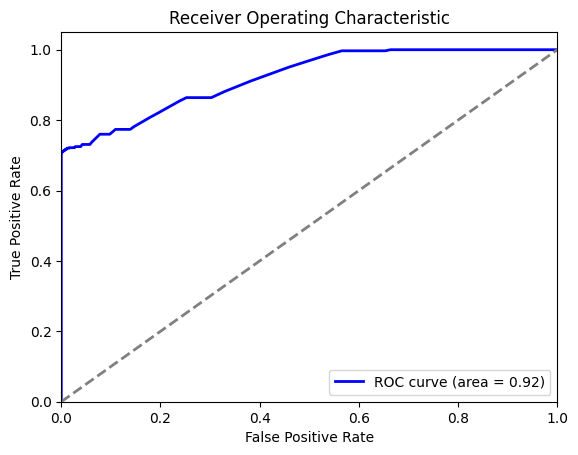

ROC AUC: 0.92031309146227


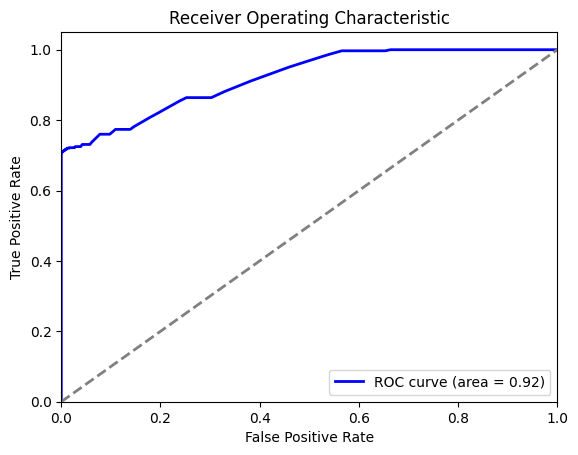

In [276]:
create_roc_auc_curve(rf, X_train, y_train)
create_roc_auc_curve(rf, X_val, y_val)

In [277]:
get_predictions(rf, X_test, save_name='predictions_rf')

   apply_promo
0     0.000000
1     0.080000
2     0.022384
3     0.014984
4     0.030000


# Random Forest Classificator with GridSearch

In [278]:
from sklearn.model_selection import GridSearchCV

# Определение параметров для Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Создание модели RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Настройка Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# Обучение Grid Search
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print('Best Parameters:', best_params)
# {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

# Обучение модели с лучшими параметрами
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


ROC AUC: 0.8848272521341621


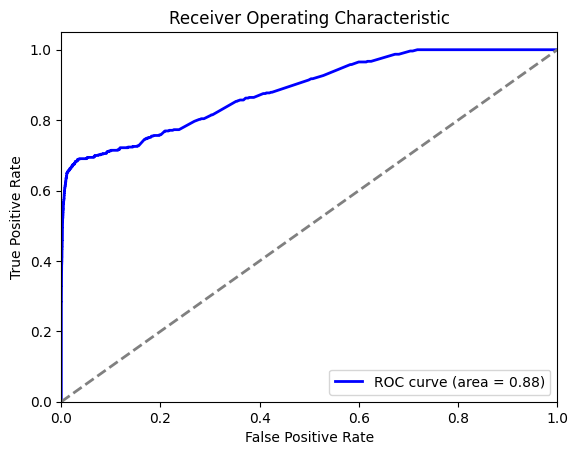

ROC AUC: 0.8848272521341621


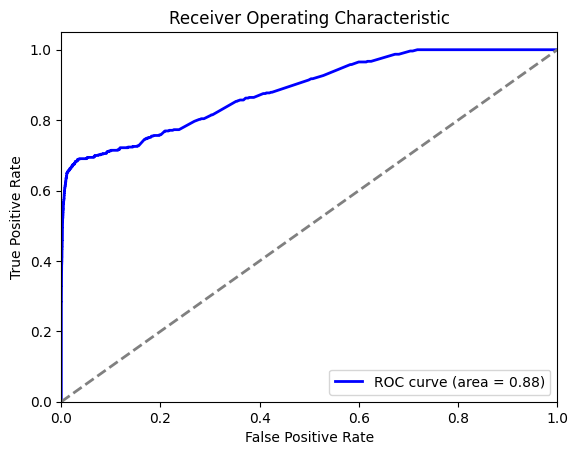

In [286]:
create_roc_auc_curve(best_model, X_train, y_train)
create_roc_auc_curve(best_model, X_val, y_val)

In [280]:
get_predictions(best_model, X_test, save_name='predictions_rf_grid_search')

   apply_promo
0     0.008960
1     0.109515
2     0.021646
3     0.016686
4     0.049070


# XGBoost

In [ ]:
!pip install optuna xgboost

In [282]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0)
    }

    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train)], early_stopping_rounds=10, verbose=False)

    y_prob = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_prob)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print('Best Parameters for XGBClassifier:', best_params)

# Обучение модели с лучшими параметрами
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

[I 2024-07-19 15:18:38,775] A new study created in memory with name: no-name-09fad0f2-1779-4f4c-8680-6b8789a9e4af
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-07-19 15:18:39,138] Trial 0 finished with value: 0.7621568994288468 and parameters: {'n_estimators': 114, 'learning_rate': 0.07761102021191511, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.8871477128664707, 'colsample_bytree': 0.9819862818591114}. Best is trial 0 with value: 0.7621568994288468.
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-07-19 15:18:40,058] Trial 1 finished with value

Best Parameters for XGBClassifier: {'n_estimators': 190, 'learning_rate': 0.11617481567899964, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.9326587056308783, 'colsample_bytree': 0.8181360147938536}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8181360147938536, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.11617481567899964,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=190, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

ROC AUC: 0.8851341167694976


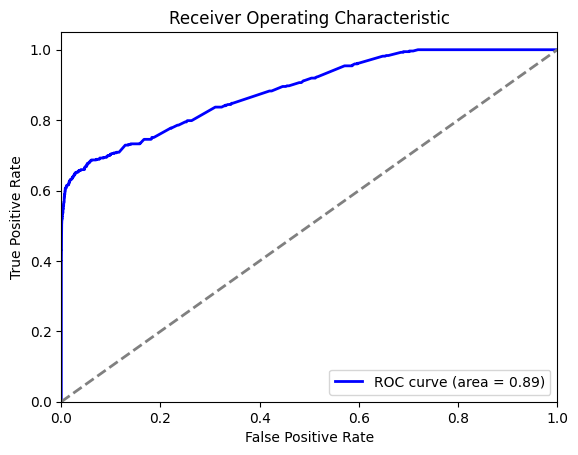

ROC AUC: 0.8851341167694976


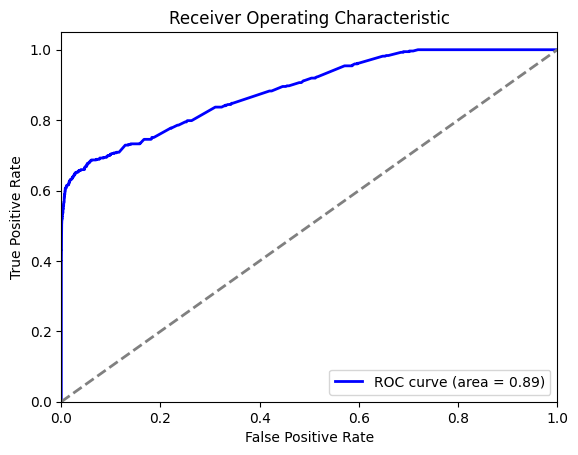

   apply_promo
0     0.008038
1     0.116429
2     0.021794
3     0.018451
4     0.056252


In [287]:
create_roc_auc_curve(best_xgb_model, X_train, y_train)
create_roc_auc_curve(best_xgb_model, X_val, y_val)
get_predictions(best_xgb_model, X_test, save_name='predictions_xgb_optuna')